In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [2]:
print(tf.config.list_physical_devices())
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.15.0


In [3]:
# pathh = 'MNISTClassifier'

# for parent, dirs, files in os.walk(pathh, topdown=False):
#   for file in files:
#     file_path = os.path.join(parent, file)
#     os.remove(file_path)
#   for dir in dirs:
#     dir_path = os.path.join(parent, dir)
#     os.rmdir(dir_path)

# os.rmdir('./MNISTClassifier')

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
# x_train, x_test = images, test_images
# y_train, y_test = labels, test_labels

dtype('float32')

In [6]:
train_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in train_images])
test_images = np.asarray([cv2.cvtColor(im, cv2.COLOR_GRAY2RGB) for im in test_images])

In [10]:
train_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in train_images]
train_images = np.asarray(train_images)


In [11]:
test_images = [cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in test_images]
test_images = np.asarray(test_images)


In [12]:
print(train_images.shape, test_images.shape)

(60000, 64, 64, 3) (10000, 64, 64, 3)


In [6]:
print('x_train.shape', train_images.shape)
print('y_train.shape', train_images.shape)


x_train.shape (60000, 28, 28, 3)
y_train.shape (60000, 28, 28, 3)


In [13]:
full_dataset = np.concatenate((train_images, test_images), axis=0)
full_dataset.shape

(70000, 64, 64, 3)

In [14]:
full_dataset.shape

(70000, 64, 64, 3)

In [14]:
# full_dataset_64 = np.asarray([cv2.resize(im.numpy(), (64, 64), interpolation=cv2.INTER_NEAREST) for im in full_dataset])
# full_dataset_64.shape

In [15]:
full_dataset_label = np.concatenate((train_labels, test_labels), axis=0)
full_dataset_label.shape

(70000,)

In [7]:
# train_images = np.asarray([cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in train_images])
# test_images = np.asarray([cv2.resize(im, (64, 64), interpolation=cv2.INTER_NEAREST) for im in test_images])

In [8]:
# x_test, y_test = test_images, test_labels

In [9]:
# x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=104, test_size=0.166655, shuffle=True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(full_dataset,full_dataset_label, random_state=104, test_size=0.1, shuffle=True )

In [17]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
# print('x_val.shape', x_val.shape)
# print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train.shape (63000, 64, 64, 3)
y_train.shape (63000,)
x_test.shape (7000, 64, 64, 3)
y_test.shape (7000,)


(64, 64, 3)


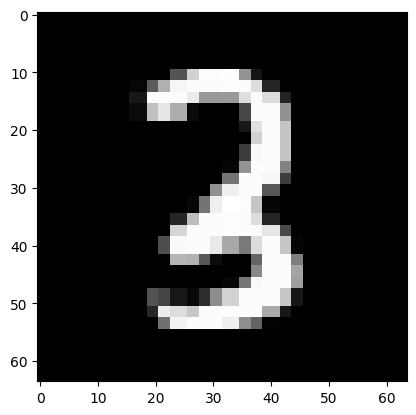

In [18]:
x_test_43 = x_test[35]

print(x_test_43.shape)
digit = x_test_43
fig = plt.figure
plt.imshow(digit)
# print(x_test_43)

#twos are located at [(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]

In [19]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)
#select labels that are digit 2

[(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]


# Networks

## Custom

In [20]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

## Backbone Networks

In [107]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input

In [108]:
class VGG16model(tf.keras.Model):
    def __init__(self, base_model):
        super(VGG16model, self).__init__()
        #instantiate base model
        self.base_model = base_model
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.base_model, self.flatten, self.dense1, self.dense2]

    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob
    

In [109]:
input_layer = tf.keras.layers.Input(shape=(64, 64, 3))
base_model = VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)
base_model.trainable = False



In [110]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## Model fit and saving

In [21]:
class SavefinalTrainingLogitsProp(keras.callbacks.Callback):
    def on_train_end(self, logs):
        self.out = model.predict(x_train)
        self.prob = tf.nn.softmax(self.out)
        print(self.out.shape, self.prob.shape)

In [22]:
def plot_loss_acc(train_metric_values, val_metric_values, type=None, plt_title=None):
    epochs = range(1, len(train_metric_values) +1)
    plt.plot(epochs, train_metric_values, 'bo', label=f'Training {type}')
    plt.plot(epochs, val_metric_values, 'b', label=f'validation {type}')
    plt.title(plt_title)
    plt.xlabel('Epochs')
    plt.ylabel(f'{type}')
    plt.legend()
    plt.show()
    
    

In [23]:
model_custom = MNISTClassifier()
model_custom.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2)
# model_custom.save('MNISTClassifier')

2024-03-01 11:46:49.014536: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-03-01 11:46:49.014601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-01 11:46:49.014612: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-01 11:46:49.014707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 11:46:49.014768: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10
   1/1575 [..............................] - ETA: 11:29 - loss: 2.2158 - accuracy: 0.2500

2024-03-01 11:46:49.980560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1575/1575 [==============================] - 16s 10ms/step - loss: 0.3331 - accuracy: 0.8997 - val_loss: 0.1305 - val_accuracy: 0.9632
Epoch 2/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.1622 - accuracy: 0.9558 - val_loss: 0.1152 - val_accuracy: 0.9708
Epoch 3/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.1820 - accuracy: 0.9592 - val_loss: 0.1386 - val_accuracy: 0.9729
Epoch 4/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.2348 - accuracy: 0.9601 - val_loss: 0.1776 - val_accuracy: 0.9732
Epoch 5/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.4061 - accuracy: 0.9576 - val_loss: 0.2823 - val_accuracy: 0.9774
Epoch 6/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.7165 - accuracy: 0.9565 - val_loss: 0.5579 - val_accuracy: 0.9739
Epoch 7/10
1575/1575 [==============================] - 15s 9ms/step - loss: 1.2569 - accuracy: 0.9556 - val_loss: 0.8934 - val_accuracy: 0.

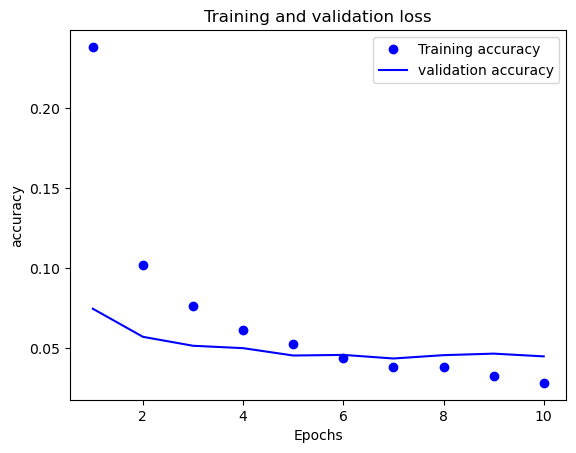

In [26]:
loss_values = custom_history.history["loss"]
val_loss_values = custom_history.history["val_loss"]
plot_loss_acc(loss_values, val_loss_values, type='accuracy',  plt_title="Training and validation loss")

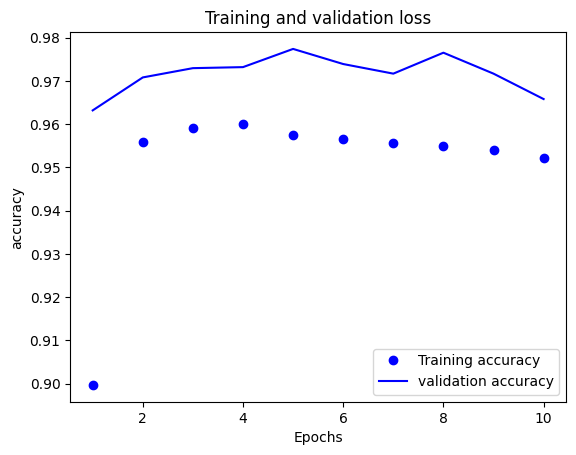

In [27]:
accuracy_values = custom_history.history["accuracy"]
val_accuracy_values = custom_history.history["val_accuracy"]
plot_loss_acc(accuracy_values, val_accuracy_values, type='accuracy',  plt_title="Training and validation loss")

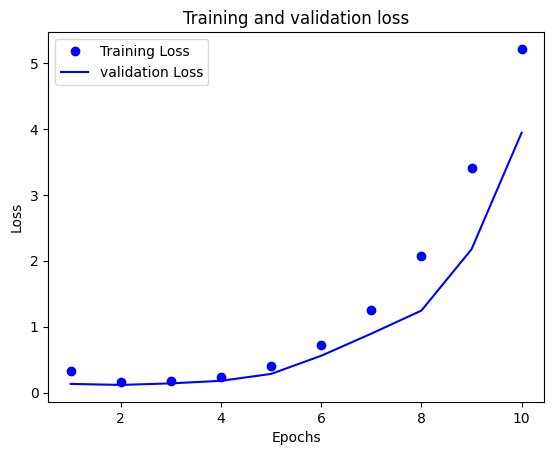

In [26]:
loss_values = custom_history.history["loss"]
val_loss_values = custom_history.history["val_loss"]
plot_loss_acc(loss_values, val_loss_values, type='Loss',  plt_title="Training and validation loss")

In [112]:
model_vgg16 = VGG16model(base_model)
model_vgg16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

vgg16_history = model_vgg16.fit(x_train, y_train, epochs=10, validation_split=0.2) 
# custom_history = model_custom.fit(x_train, y_train, epochs=10, validation_split=0.2)
# model_vgg16.save('VGG16Classifier')

Epoch 1/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.2081 - accuracy: 0.9440 - val_loss: 0.0831 - val_accuracy: 0.9749
Epoch 2/10
1575/1575 [==============================] - 34s 21ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0742 - val_accuracy: 0.9757
Epoch 3/10
1575/1575 [==============================] - 34s 21ms/step - loss: 0.0594 - accuracy: 0.9813 - val_loss: 0.0630 - val_accuracy: 0.9803
Epoch 4/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0592 - val_accuracy: 0.9810
Epoch 5/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0438 - accuracy: 0.9856 - val_loss: 0.0541 - val_accuracy: 0.9834
Epoch 6/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0514 - val_accuracy: 0.9842
Epoch 7/10
1575/1575 [==============================] - 34s 22ms/step - loss: 0.0357 - accuracy: 0.9882 - val_loss: 0.0605 -

# Load model and make predictions

## prepare images and labels

In [35]:
twos_tupple = [(11, 2), (20, 2), (24, 2), (37, 2), (46, 2), (56, 2), (60, 2), (65, 2), (68, 2), (78, 2)]
reshaped_sample_twos = []
class_arr = []

for tup in twos_tupple:
    a_two = x_test[tup[0]]
    print('a_two.shape', a_two.shape)
    a_two = np.reshape(a_two, (-1, 64, 64, 3))
    print('a_two.shape', a_two.shape)
    a_two_label = y_test[tup[0]]
    a_two_label = tf.convert_to_tensor(a_two_label)
    class_arr.append(a_two_label)
    # print(a_two_label)
    reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)

a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)
a_two.shape (64, 64, 3)
a_two.shape (1, 64, 64, 3)


In [32]:
print(y_test[35])

3


In [33]:
# model_mnist = tf.keras.models.load_model('MNISTClassifier')

predictions = []
for sample in reshaped_sample_twos:
    sample_prediction = model_custom.predict(sample)
    predictions.append(sample_prediction)
#check a prediction
print(np.argmax(predictions[1][0]))

1/1 [==============================] - 0s 17ms/step
2


In [34]:
print(reshaped_sample_twos[0].shape)
# drop first dimension (batch) and prepare for attack
squeze_two = np.squeeze(reshaped_sample_twos[2])
print(squeze_two.shape)
# squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
# squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[35]
y = tf.convert_to_tensor(y)
print(y)
print(x.shape)

(1, 64, 64, 3)
(64, 64, 3)
tf.Tensor(3, shape=(), dtype=uint8)
(1, 64, 64, 3)


# Attack and Plot

In [ ]:
num_iter, eps = 50, 0.01

In [102]:
def pgd(model, img, num_iter=50, eps=0.01):
    y = model(img)[0]
    x = tf.identity(img)
    perturbation = tf.zeros(img.shape, dtype=tf.float32)

    for k in range(num_iter):
        
        with tf.GradientTape() as tape:
            tape.watch(x)
            y_pred = model(x)[0]
            if np.argmax(y_pred[0]) != np.argmax(y[0]):
                break
            # print(y_pred == y)
            loss = tf.losses.categorical_crossentropy(y, y_pred, from_logits=True)
            # it's a good practice to use tf.reduce_mean to compute the mean of the losses across all dimensions. 
            #This ensures that the loss is a scalar value, which is the expected input for the gradient calculation
            loss = tf.reduce_mean(loss)
        gradient = tape.gradient(loss, x)
        # print('gra shape', gradient.shape)
        perturbation += eps * tf.sign(gradient)
        x += perturbation
        x = tf.clip_by_value(x, 0, 1)

    return x, perturbation
        
    

In [103]:
a_two_a = reshaped_sample_twos[0]

pgd(model_custom, a_two_a, eps=0.01)

(<tf.Tensor: shape=(1, 64, 64, 3), dtype=float32, numpy=
 array([[[[0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          [0.35999995, 0.35999995, 0.35999995],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         

## Batch attack

In [84]:
def run_attacks(img_arr, class_arr, model, att_func, eps=0.001, type=None):
    results = []
    for img, cls in zip(img_arr, class_arr):
        print(img.shape)
        if type == 'fgsm':
            x_test_adv, perturbation = att_func(model, img, cls, eps)
        elif type == 'deepfool':
            x_test_adv, perturbation = att_func(model, img)
        elif type == 'pgd':
            x_test_adv, perturbation = att_func(model, img)
        results.append((x_test_adv, perturbation))
    return results
    

In [104]:
attack_results = run_attacks(reshaped_sample_twos, class_arr, model_custom, pgd, type='pgd')

(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)
(1, 64, 64, 3)


In [105]:
print(attack_results[0][0].shape)
adv_image = np.squeeze(attack_results[0][0])
# adv_image = np.expand_dims(adv_image, axis=2)
org_image = np.squeeze(reshaped_sample_twos[0])
perturbation = np.squeeze(attack_results[0][1])
org_image.shape
adv_image.shape
# plt.imshow(adv_image, cmap='gray')

(1, 64, 64, 3)


(64, 64, 3)

In [1]:
plt.imshow(adv_image, cmap='gray')

NameError: name 'plt' is not defined

In [88]:
print(reshaped_sample_twos.shape)

(10, 1, 64, 64, 3)


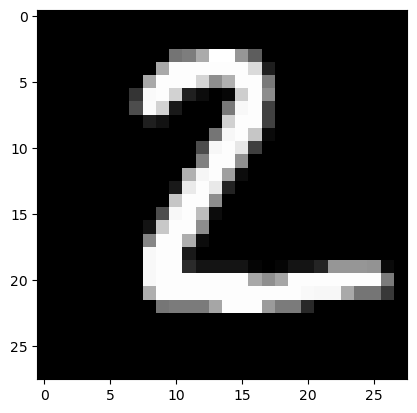

In [26]:
plt.imshow(org_image, cmap='gray')

In [40]:
adv_pred = model_mnist.predict(x_test_adv)
org_pred = model_mnist.predict(xb)

org_pred = np.argmax(org_pred[1])
adv_pred = np.argmax(adv_pred[1])
print(f"org_pred {org_pred} \t adv_pred {adv_pred}")

1/1 [==============================] - 0s 9ms/step
org_pred 2 	 adv_pred 1


# Batch distance measure

In [90]:
# flatten the image array as a 1D array
org_image_flattened = org_image.flatten()
adv_image_flattened = adv_image.flatten()

distance = np.linalg.norm(org_image_flattened - adv_image_flattened)
distance = round(distance, 2)
print(distance)

24.51


In [29]:
# adv_image = np.squeeze(attack_results[0][0])
# adv_image = np.expand_dims(adv_image, axis=2)
# org_image = np.expand_dims(np.squeeze(reshaped_sample_twos[0]), axis=2)
# perturbation = np.expand_dims(np.squeeze(attack_results[0][1]), axis=2)
# org_image.shape
# adv_image.shape

In [91]:
def batch_distance_measure(adv_img_arr, org_img_arr):
    l2_norm_distance = []
    for adv_img, org_img in zip(adv_img_arr, org_img_arr):
        cur_adv_img = np.array(adv_img[0])
        # print(cur_adv_img.shape)
        # print(org_img.shape)
        adv_img_flattened = cur_adv_img.flatten()
        org_img_flattened = org_image.flatten()
        distance = np.linalg.norm(org_img_flattened - adv_img_flattened)
        distance = format(distance, '.2f')
        l2_norm_distance.append(distance)
    return l2_norm_distance
        

In [93]:
# l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
# print(l2_norm_distance)

In [92]:
l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
print(l2_norm_distance)

['24.51', '44.39', '50.42', '43.98', '39.57', '45.11', '40.12', '44.76', '48.07', '47.59']


# Visualize predictions and images

In [89]:
# fig = plt.figure(figsize=(10, 10))

# rows = 1
# columns = 3

# fig.add_subplot(rows, columns, 1)
# plt.imshow(org_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Original Image \n predictions: {org_pred}')

# fig.add_subplot(rows, columns, 2)
# plt.imshow(perturbation, cmap='gray')
# plt.axis('off')
# plt.title(f'Pertubation\n /Distance: {distance}')

# fig.add_subplot(rows, columns, 3)
# plt.imshow(adv_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

In [96]:
predi = model_custom.predict(reshaped_sample_twos[0])
reshaped_sample_twos[0].shape
attack_results[0][0].shape
predioo = model_custom.predict(attack_results[0][0])
print(np.argmax(predi), np.argmax(predioo))

1/1 [==============================] - 0s 10ms/step
2 5


In [100]:
def batch_visualization(adv_img_pert_arr, org_img_arr, dist_arr, model=None):
    total_plots = len(dist_arr)
    rows = total_plots
    columns = 3
    for idx in range(total_plots):
        fig = plt.figure(figsize=(10, 10))
        org_pred = model.predict(reshaped_sample_twos[0])
        list_org_pred = list(org_pred)
        list_org_pred = list_org_pred[1][0]
        org_pred_cls = np.argmax(org_pred)
        org_conf = round(list_org_pred[org_pred_cls], 1)
        cur_org_img = org_img_arr[idx]
        fig.add_subplot(rows, columns, 1)
        cur_org_img_sq = np.squeeze(cur_org_img)
        plt.imshow(cur_org_img_sq, cmap='hot')
        plt.axis('off')
        plt.title(f'Original Image \n predictions: {org_pred_cls} \n ')

        cur_dist = dist_arr[idx]
        fig.add_subplot(rows, columns, 2)
        cur_pert_img = np.squeeze(perturbation)
        plt.imshow(cur_pert_img, cmap='hot')
        plt.axis('off')
        plt.title(f'Pertubation\n /Distance: {cur_dist}')

        cur_adv_img = adv_img_pert_arr[idx][0]
        adv_pred = model.predict(cur_adv_img)
        adv_pred_cls = np.argmax(adv_pred)
        list_adv_pred = list(adv_pred)
        list_adv_pred = list_adv_pred[1][0]
        adv_conf = format(list_adv_pred[adv_pred_cls], '.1f')
        cur_adv_img_sq = np.squeeze(cur_adv_img)
        fig.add_subplot(rows, columns, 3)
        plt.imshow(cur_adv_img_sq, cmap='hot')
        plt.axis('off')
        plt.title(f'Adversarial Image \n Prediction: {adv_pred_cls} \n Confidence {adv_conf}')
        
    plt.show()

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 6ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 6ms/step


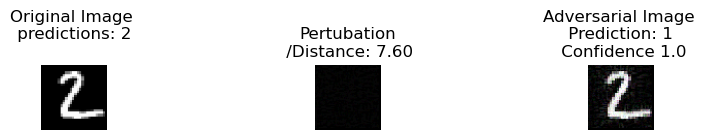

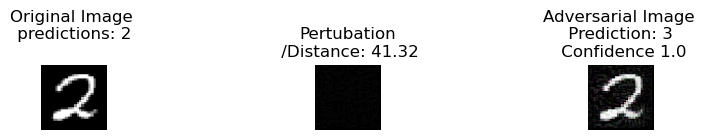

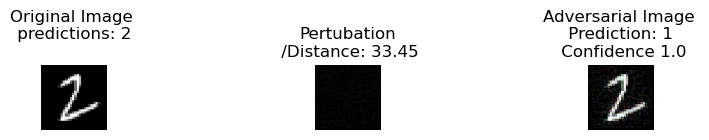

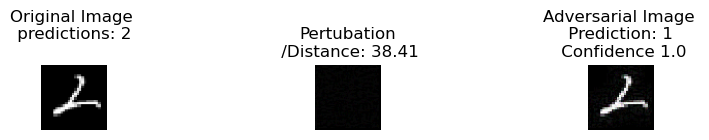

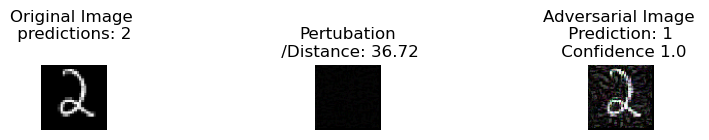

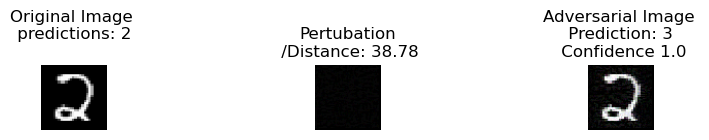

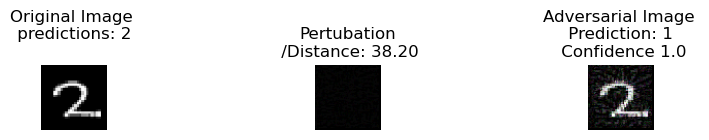

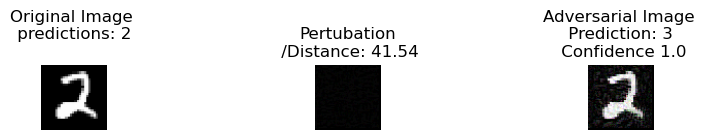

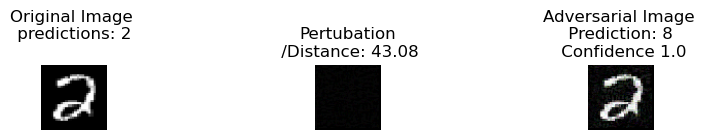

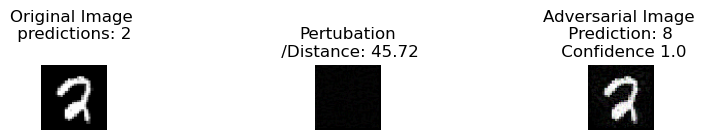

In [64]:
batch_visualization(attack_results, reshaped_sample_twos, l2_norm_distance)

1/1 [==============================] - 0s 13ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 9ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 7ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 7ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 7ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 7ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 8ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 8ms/step


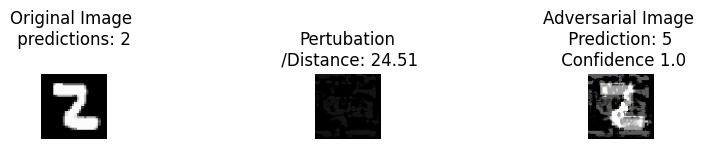

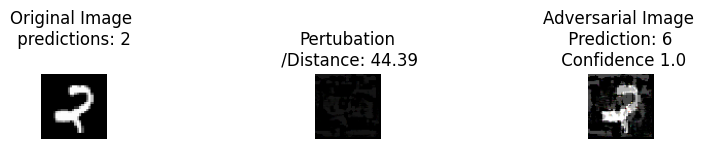

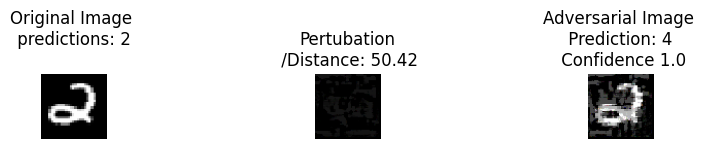

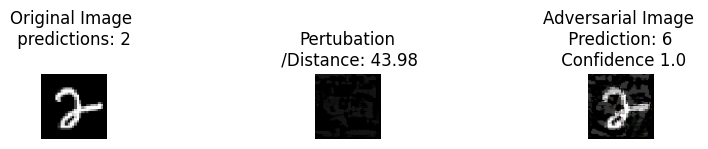

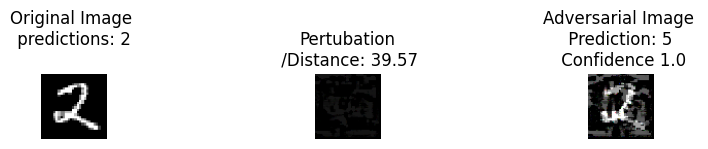

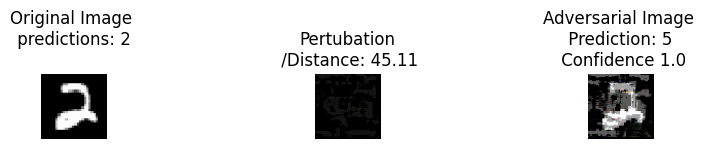

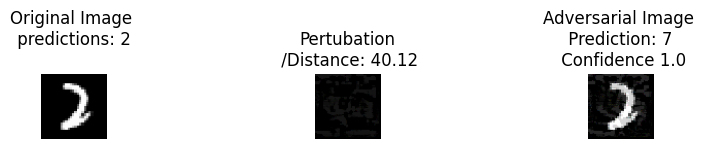

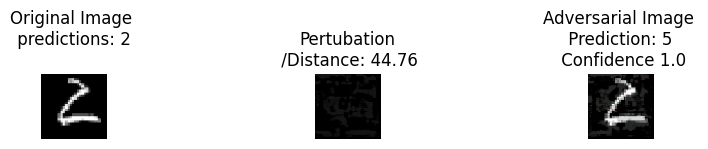

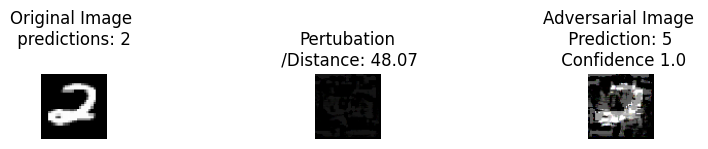

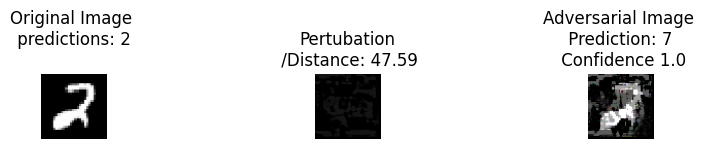

In [101]:
batch_visualization(attack_results, reshaped_sample_twos, l2_norm_distance, model=model_custom)